# Continuous ellipsoids

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import os
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import argparse
import os
from pycolbench.utils import FIELDS, SOLVER_NAMES, RESULTS_PATH, SOLVER_COLORS, SOLVER_NAMES_PLOT
from typing import List, Dict

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
savefig = True

In [2]:
benchmark = "continuous_ellipsoids"
processed_results_path = os.path.join(RESULTS_PATH, benchmark, "processed")
processed_results_path = os.path.join("..", processed_results_path)
processed_paths = os.listdir(processed_results_path)

path_results = []
dist_categories = ["distant", "close_proximity", "overlapping"]
result_solvers = {}
selected_solvers = [SOLVER_NAMES.GJK, SOLVER_NAMES.Nesterov]
for solver_name in selected_solvers:
    dfs = []
    for di, dist_category in enumerate(dist_categories):
        path_to_load = None
        for path in processed_paths:
            # Select distance category
            if path.count(dist_category):
                # Add solver to dicts of paths
                if path.count("_" + solver_name.value + "_"):  # Unique to each solver
                    path_to_load = os.path.join(processed_results_path, path)
                    break
        if path_to_load is not None:
            df = pd.read_csv(path_to_load)
            dfs.append(df)
    if len(dfs) > 0:
        df = pd.concat([dfs[i] for i in range(len(dfs))])
        result_solvers[solver_name.value] = df
    else:
        print("OOPSIE")

In [3]:
plots_path = "./plots"
if not os.path.exists(plots_path):
    os.mkdir(plots_path)
plots_path = os.path.join(plots_path, "continuous_ellipsoids")
if not os.path.exists(plots_path):
    os.mkdir(plots_path)

# DISTANCE COMPUTATION

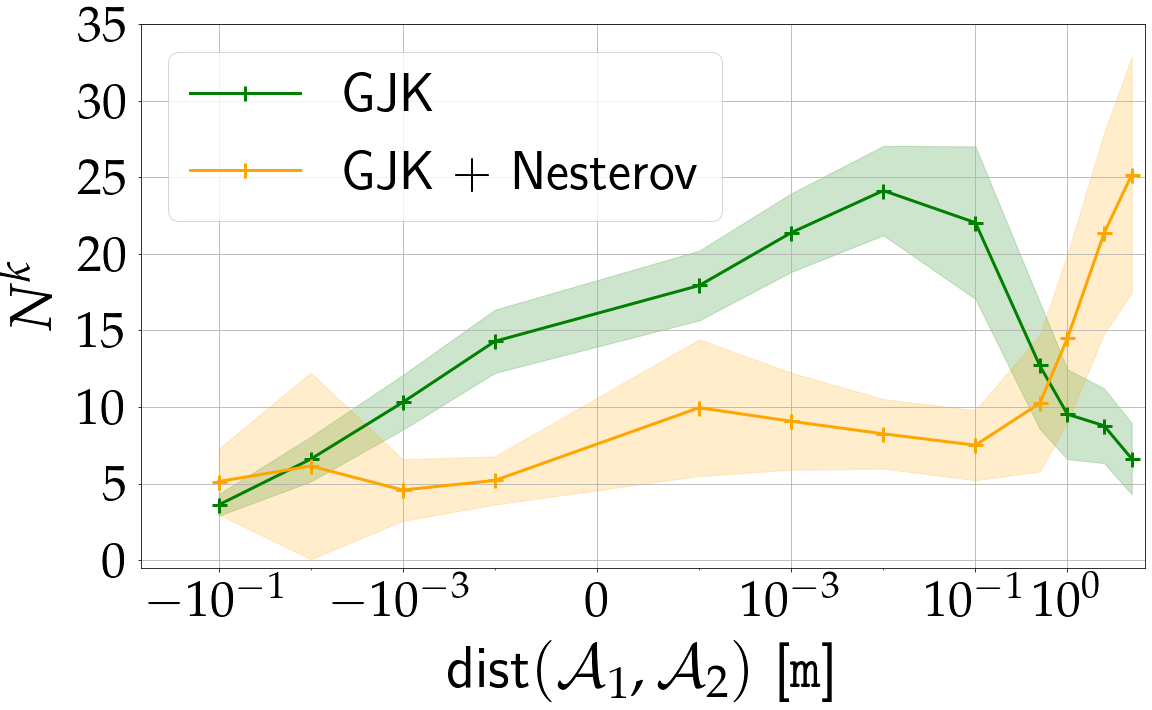

In [4]:
Width = 18
Height = 10
fig = plt.figure(figsize=(Width, Height))
names = ["GJK", "GJK + Nesterov"]
for si, solver_name in enumerate(result_solvers.keys()):
    res_solver = result_solvers[solver_name]
    distances = res_solver[FIELDS.dist_shapes.value].tolist()
    mean = np.array(res_solver["mean"].tolist())
    std = np.array(res_solver["std"].tolist())
    color = SOLVER_COLORS[solver_name]
    name = names[si]
    
    plt.plot(distances, mean, "+", label=name,
             color=color, linestyle="-", linewidth=3,
             markersize=15, markeredgewidth=3)
             
    plt.fill_between(distances, mean - std, mean + std,
                     color=color,
                     alpha=0.2)
    
    xticks = [-1e-1, -1e-3, 0, 1e-3, 1e-1, 1]
    plt.xscale("symlog", linthresh=1e-4)
    plt.xticks(xticks, fontsize=50)
    plt.yticks(fontsize=50)
    plt.xlim(-0.7, 7)
    plt.ylim(-0.5, 35)
    
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', pad=10)
    plt.legend(fontsize=55, loc="upper left")
    plt.grid(True)
    
    dist_shapes_str = r"dist$(\mathcal{A}_1, \mathcal{A}_2)$ [\texttt{m}]"
    plt.xlabel(dist_shapes_str, fontsize=60, labelpad=15)
    plt.ylabel(r"$N^k$", fontsize=60, labelpad=15)
if savefig:
    save_path = os.path.join(plots_path, "continuous_ellipsoids_distance_computation_benchmark.pdf")
    plt.savefig(save_path, bbox_inches="tight")
plt.show()

# BOOLEAN COLLISION CHECK

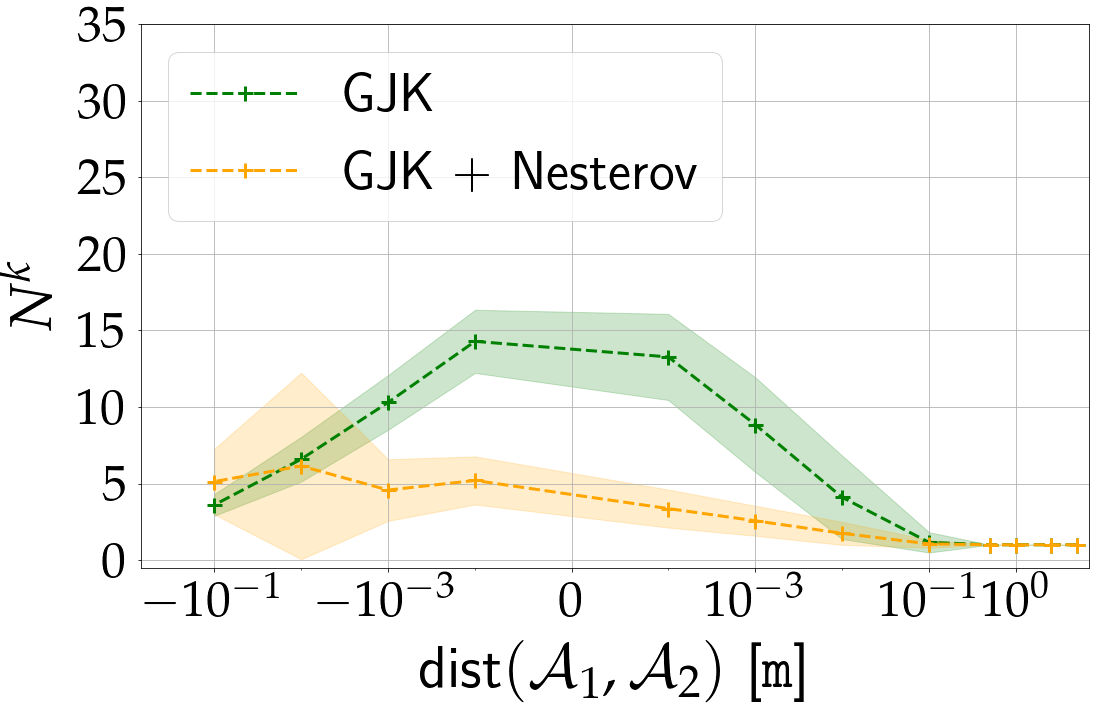

In [5]:
Width = 17
Height = 10
fig = plt.figure(figsize=(Width, Height))
# print(result_solvers.keys())
for si, solver_name in enumerate(result_solvers.keys()):
    res_solver = result_solvers[solver_name]
    distances = res_solver[FIELDS.dist_shapes.value].tolist()
    mean = np.array(res_solver["mean_early"].tolist())
    std = np.array(res_solver["std_early"].tolist())
    color = SOLVER_COLORS[solver_name]
    # name = SOLVER_NAMES_PLOT[solver_name]
    name = names[si]
    
    plt.plot(distances, mean, "+", label=name,
             color=color, linestyle="--", linewidth=3,
             markersize=15, markeredgewidth=3)
    
    plt.fill_between(distances, mean - std, mean + std,
                     color=color,
                     alpha=0.2)
    
    xticks = [-1e-1, -1e-3, 0, 1e-3, 1e-1, 1]
    plt.xscale("symlog", linthresh=1e-4)
    plt.xticks(xticks, fontsize=50)
    plt.yticks(fontsize=50)
    plt.xlim(-0.7, 7)
    plt.ylim(-0.5, 35)
    
    ax = plt.gca()
    ax.tick_params(axis='both', which='major', pad=10)
    plt.legend(fontsize=55, loc="upper left")
    plt.grid(True)
    
    dist_shapes_str = r"dist$(\mathcal{A}_1, \mathcal{A}_2)$ [\texttt{m}]"
    plt.xlabel(dist_shapes_str, fontsize=60, labelpad=15)
    plt.ylabel(r"$N^k$", fontsize=60, labelpad=15)

if savefig:
    save_path = os.path.join(plots_path, "continuous_ellipsoids_boolean_check_benchmark.pdf")
    plt.savefig(save_path, bbox_inches="tight")
plt.show()